<a href="https://colab.research.google.com/github/zq0315/blog/blob/master/L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

w的L2范数是： 0.028861988335847855
tensor([[-0.0009],
        [ 0.0007],
        [ 0.0008],
        [-0.0059],
        [ 0.0056],
        [-0.0008],
        [ 0.0020],
        [ 0.0011],
        [ 0.0052],
        [ 0.0069],
        [ 0.0069],
        [-0.0081],
        [-0.0031],
        [ 0.0007],
        [ 0.0028],
        [-0.0011],
        [-0.0012],
        [-0.0012],
        [-0.0002],
        [ 0.0035],
        [-0.0047],
        [-0.0033],
        [ 0.0051],
        [ 0.0022],
        [ 0.0002],
        [-0.0043],
        [ 0.0052],
        [ 0.0005],
        [-0.0017],
        [ 0.0054],
        [ 0.0012],
        [ 0.0094],
        [-0.0058],
        [ 0.0007],
        [ 0.0073],
        [-0.0045],
        [ 0.0023],
        [ 0.0037],
        [ 0.0039],
        [ 0.0006],
        [ 0.0072],
        [ 0.0006],
        [-0.0042],
        [ 0.0034],
        [-0.0059],
        [ 0.0037],
        [-0.0006],
        [-0.0039],
        [-0.0042],
        [ 0.0004]], requires_grad=True)

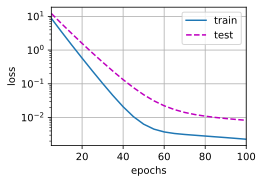

In [24]:
#权重衰减使用最广泛的正则化技术L2范数，将原来的训练目标最小化训练标签上的预测损失，调整为最小化预测损失和惩罚项之和
#与特征选择相比，权重衰减为我们提供了一种连续的机制来调整函数的复杂度。较小的λ值对应较少约束的w，而较大的λ值对w的约束更大
#设置输入特征参数num_inputs=10，可以看到训练误差和测试误差下降明显，随着输入参数的增加，训练误差有了减少，但测试误差没有减少，
#这意味着出现了严重的过拟合。
!pip install d2l
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

n_train, n_test, num_inputs, batch_size = 20, 100, 50, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
#print(true_w, true_b)
train_data = d2l.synthetic_data(true_w, true_b, n_train)
#print(train_data)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    print(w.shape, b)
    return [w, b]
init_params()
#定义L2范数惩罚
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())
    print(w)
train(lambd=5)
#print(w)

In [7]:
!pip install d2l
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4, 2.5])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 10)
print(features, labels)

tensor([[-1.4808, -1.6473, -1.1566],
        [ 0.2122,  0.8749,  1.1102],
        [-0.3730, -2.0634,  0.5415],
        [ 0.1989,  0.1838,  0.0527],
        [-1.3092, -1.0017, -2.1223],
        [ 0.0183, -0.3728, -0.2596],
        [ 0.1002, -0.1097, -0.3564],
        [ 1.2139,  1.0366,  1.3632],
        [ 0.2742,  0.0586,  1.1613],
        [ 0.0438,  1.1362,  0.9228]]) tensor([[ 3.9532],
        [ 4.4189],
        [11.8221],
        [ 4.0968],
        [-0.3086],
        [ 4.8402],
        [ 3.8916],
        [ 6.5123],
        [ 7.4527],
        [ 2.7211]])
